In [11]:
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt

# E-step

In [12]:
def e_step(data, lambda_, pi):
    n = len(data)
    k = len(lambda_)
    r = np.zeros((n, k))
    for i in range(n):
        total_prob = 0
        for j in range(k):
            total_prob += pi[j] * poisson.pmf(data[i], lambda_[j])
        for j in range(k):
            r[i, j] = (pi[j] * poisson.pmf(data[i], lambda_[j])) / total_prob
    return r

# M-step

In [13]:
def m_step(data, r):
    lambda_ = np.sum(r * data[:, np.newaxis], axis=0) / np.sum(r, axis=0)
    pi = np.sum(r, axis=0) / len(data)
    return lambda_, pi


# EM Algorithm

In [14]:
def em_algorithm(data, K, max_iter=100, tol=1e-6):
    np.random.seed(42)
    lambda_ = np.random.uniform(1, 3, K)
    pi = np.random.dirichlet(np.ones(K))
    log_likelihood_old = -np.inf
    log_likelihoods = []
    for i in range(max_iter):
        r = e_step(data, lambda_, pi) # E-step
        lambda_, pi = m_step(data, r) # M-step
        log_likelihood_new = 0
        for j in range(len(data)):
            log_likelihood_new += np.log(np.sum([pi[k] * poisson.pmf(data[j], lambda_[k]) for k in range(K)]))
        if np.abs(log_likelihood_new - log_likelihood_old) < tol:
            print(f"Converged at iteration {i + 1}")
            break
        log_likelihood_old = log_likelihood_new
        log_likelihoods.append(log_likelihood_new)
        # print(f"Iteration {i + 1}:")
        # print(f"Lambda (Means): {lambda_}")
        # print(f"Pi (Mixing Weights): {pi}")
        # print(f"Log Likelihood: {log_likelihood_new}")

    plt.figure(figsize=(8, 5))
    plt.plot(log_likelihoods)
    plt.xlabel("Iterations")
    plt.ylabel("Log Likelihood")
    plt.title("Log Likelihood Convergence")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("log_likelihood_convergence2.png")
    plt.show()
    return lambda_, pi       

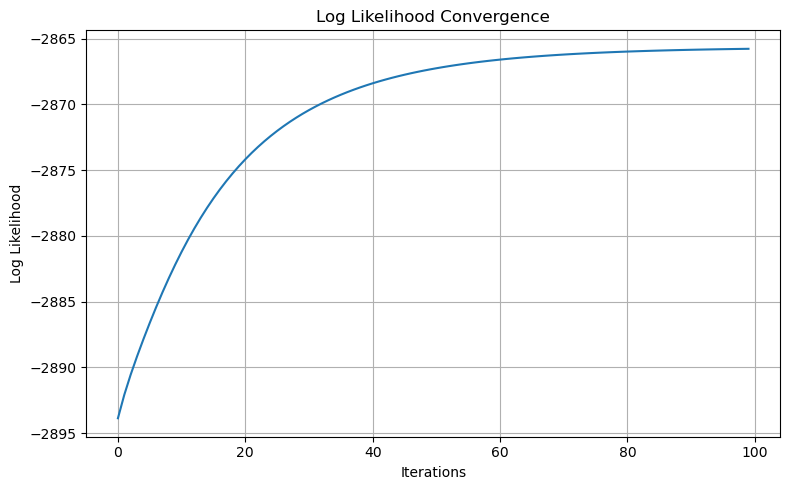

Final Estimates:
Mean number of children in families without family planning (λ_1): 10.5189
Mean number of children in families with family planning (λ_2): 15.3361
Proportion of families without family planning: 0.4497
Proportion of families with family planning: 0.5503


In [15]:
data = np.loadtxt("Assignment 4 - Online 1/em_data_online_1.txt")
K = 2
lambda_f, pi_f = em_algorithm(data, K)
print("Final Estimates:")
print(f"Mean number of children in families without family planning (λ_1): {lambda_f[0]:.4f}")
print(f"Mean number of children in families with family planning (λ_2): {lambda_f[1]:.4f}")
print(f"Proportion of families without family planning: {pi_f[0]:.4f}")
print(f"Proportion of families with family planning: {pi_f[1]:.4f}")